In [1]:
# allows to import own functions
import sys, os, re
root_project = re.findall(r'(^\S*TFM-master)', os.getcwd())[0]
sys.path.append(root_project)

from src.utils.help_func import results_searchcv, make_train_val_test, errors_distribution
from src.features.add_features import features_graph, features_pop

In [10]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd
from scipy.stats import uniform, expon, randint, loguniform


In [3]:
df = pd.read_csv(f'{root_project}/data/processed/simulation_results.csv')
df = features_graph(df)
df = features_pop(df)
df

,i_country,R0,Tc,Tr,omega,inf_pow_1,inf_pow_2,mort_pow_1,mort_pow_2,mort_pow_3,limit_deaths,n_closed,react_time,total_infected,total_death,total_removed,betweenness,degree,closeness,country_pop
0,LBN,9.490802,2.214174,21.014286,0.069029,2.918571e+03,1.140780e+02,0.007146,0.005701,0.048225,72,6,23,7.509688e+09,5.191675e+08,7.521476e+09,0.001057,0.270270,0.460581,6848925.0
1,KIR,3.161672,6.111805,19.323523,0.012080,1.265010e+05,2.916422e+02,0.003715,0.002368,0.007072,872,2,2,7.166248e+09,8.694994e+07,7.201020e+09,0.000956,0.036036,0.391534,115847.0
2,MOZ,16.439975,1.263448,20.771054,0.046275,8.045407e+04,2.297547e+03,0.002847,0.001771,0.026642,192,0,22,7.530737e+09,3.532065e+08,7.633573e+09,0.000059,0.054054,0.382759,29495962.0
3,ERI,2.141326,1.149404,2.461249,0.014779,5.593643e+03,1.969175e+02,0.006883,0.009034,0.010026,511,9,28,6.401541e+09,9.461014e+07,6.402090e+09,0.000007,0.049550,0.368159,3213972.0
4,VCT,9.327237,1.192357,11.121400,0.058201,9.880857e+03,2.862489e+02,0.013316,0.013809,0.044225,958,18,20,7.477989e+09,4.352523e+08,7.478614e+09,0.000035,0.040541,0.312236,110210.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146879,KAZ,11.763182,1.447605,17.028439,0.278547,6.074571e+03,9.460448e+02,0.023576,0.015816,0.169786,76,15,29,7.504537e+09,2.090856e+09,7.506367e+09,0.000831,0.216216,0.449393,18276499.0
146880,ITA,10.734467,0.201486,2.162848,0.029374,2.984051e+08,3.300158e+06,0.009123,0.012621,0.014495,434,12,21,7.512071e+09,2.206617e+08,7.512265e+09,0.017998,0.707207,0.572165,60431283.0
146881,ARM,19.957722,0.655780,13.087873,0.078398,2.532314e+05,6.713776e+03,0.016655,0.016688,0.061060,788,3,14,7.535460e+09,5.919213e+08,7.550623e+09,0.000054,0.117117,0.424474,2951776.0
146882,AZE,13.648353,0.278279,3.798044,0.093562,2.234922e+07,1.928435e+06,0.010039,0.004640,0.029322,314,0,12,7.552275e+09,7.113103e+08,7.602798e+09,0.000554,0.198198,0.449393,9942334.0


In [4]:
df = df.sample(20000) # par entrenar con menos muestras

features = ['Tr', 'inf_pow_1', 'inf_pow_2', 'mort_pow_1', 'mort_pow_2', 'mort_pow_3', 'limit_deaths',
           'n_closed', 'react_time','total_death', 'betweenness', 'degree', 'closeness', 'country_pop']

features = ['Tr', 'limit_deaths', 'inf_pow_2',
           'n_closed', 'react_time','total_death', 'betweenness', 'degree', 'closeness', 'country_pop']

df = df[features]

display(df)

X_train_val, y_train_val, X_test, y_test = make_train_val_test(df, out_mode=1)

num_columns = X_train_val.columns

scaler = StandardScaler()
X_train_val_scaled = scaler.fit_transform(X_train_val[num_columns].astype(np.float64))
X_test_scaled = scaler.transform(X_test[num_columns].astype(np.float64))

,Tr,limit_deaths,inf_pow_2,n_closed,react_time,total_death,betweenness,degree,closeness,country_pop
80205,6.380067,850,643.823529,1,17,8.164835e+08,0.001057,0.270270,0.460581,6848925.0
36515,21.401097,914,2146.777778,15,4,1.708221e+09,0.000025,0.135135,0.438735,3545883.0
117007,2.544114,723,704493.609103,13,12,8.450541e+07,0.000665,0.207207,0.457732,1569439.0
32584,21.812051,69,3.098266,1,23,8.984814e+08,0.000002,0.099099,0.424474,622345.0
80142,17.669311,410,14325.722746,4,21,1.053181e+08,0.017998,0.707207,0.572165,60431283.0
...,...,...,...,...,...,...,...,...,...,...
82477,7.700589,703,76884.872340,6,11,2.812735e+08,0.000000,0.009009,0.388792,38964.0
123804,12.033047,800,35.843137,0,17,1.799401e+08,0.000098,0.072072,0.388792,9587522.0
51214,18.442285,727,26.566667,6,20,3.696865e+08,0.049272,0.563063,0.559194,37058856.0
5278,13.604676,305,115.202363,5,4,2.014581e+08,0.000041,0.045045,0.333333,292680.0


Train_validation set: (16000, 9)
Test set: (4000, 9)


In [5]:
linreg = SGDRegressor().fit(X_train_val_scaled, y_train_val)
linreg

SGDRegressor()

In [6]:
y_predicted = linreg.predict(X_test_scaled)
print(r2_score(y_test, y_predicted))
print(mean_absolute_error(y_test, y_predicted))
print(mean_squared_error(y_test, y_predicted))

0.03300738686285165
502634791.36001825
4.736615309474136e+17


In [7]:
cv = cross_val_score(linreg, X_train_val_scaled, y_train_val, n_jobs=-1)
print(cv.mean(), cv.std())

0.037151468996638036 0.008232509446305717


In [8]:
for feature, coef in zip(X_train_val.columns, linreg.coef_):
    print(feature, coef)

Tr -283097.7821468076
limit_deaths 13391198.814312069
inf_pow_2 110387526.51376644
n_closed -47252160.35669827
react_time 69467734.29246072
betweenness -4555658.87186085
degree 35338474.4382039
closeness -46381139.85405149
country_pop -951006.1090314983


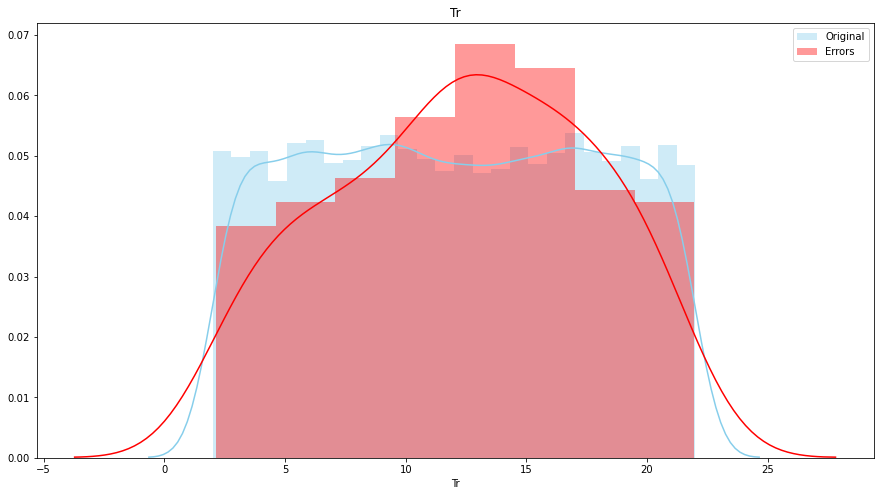

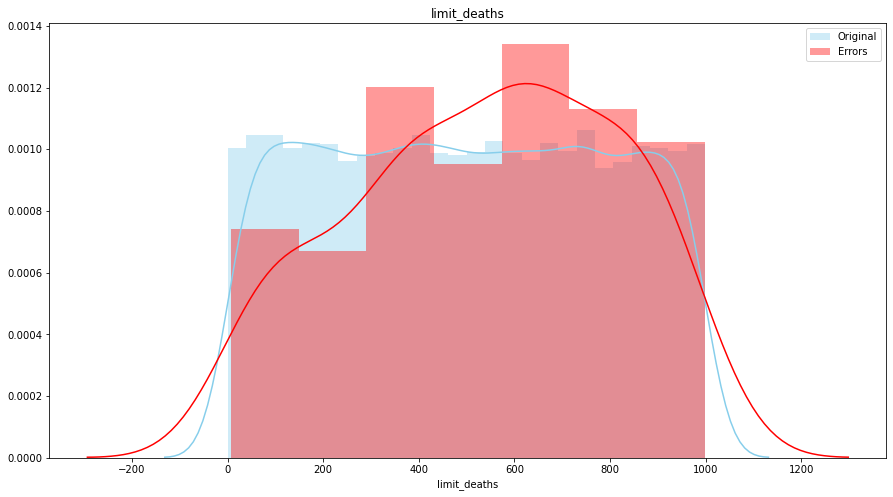

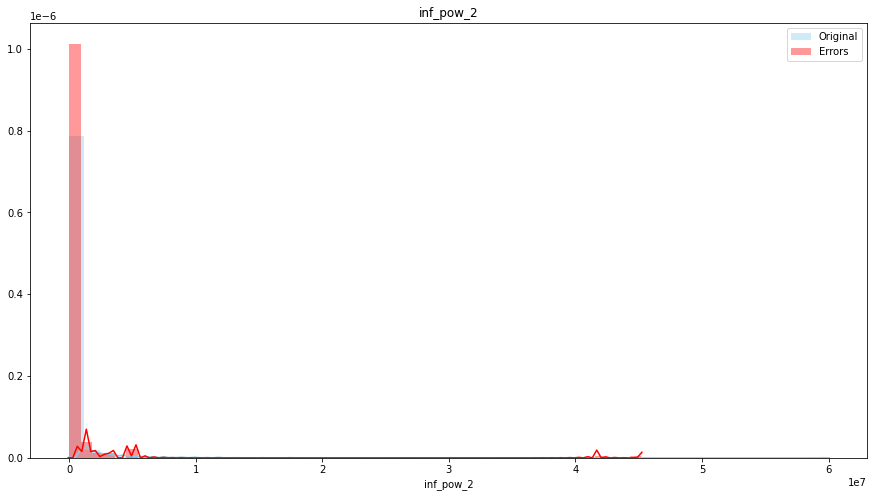

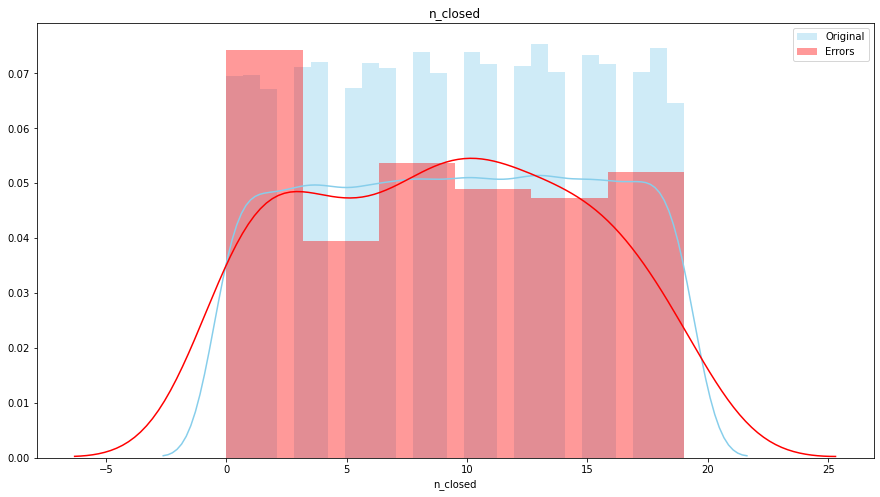

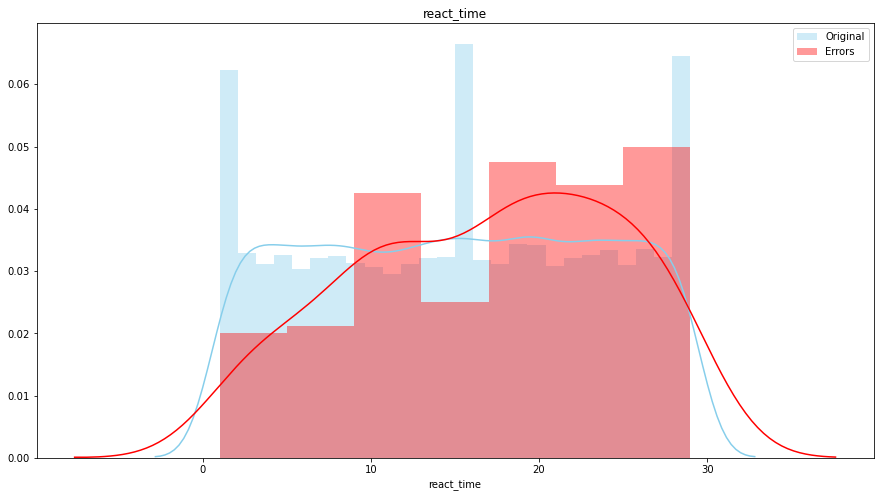

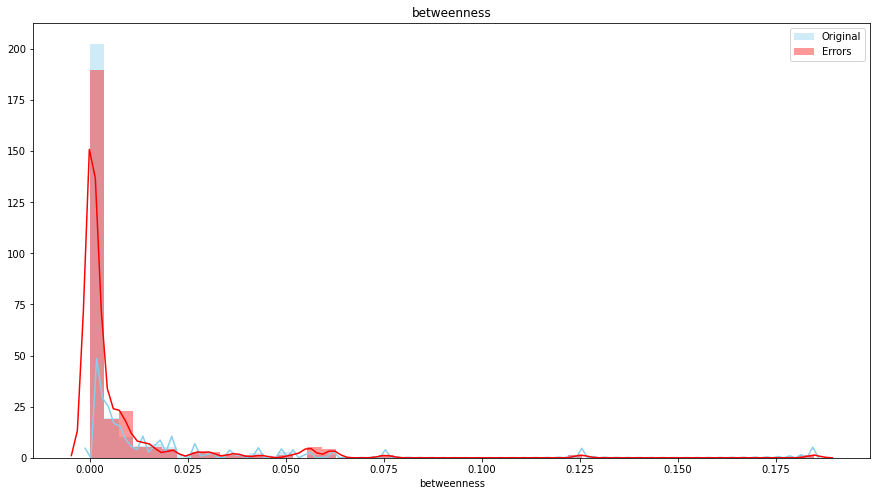

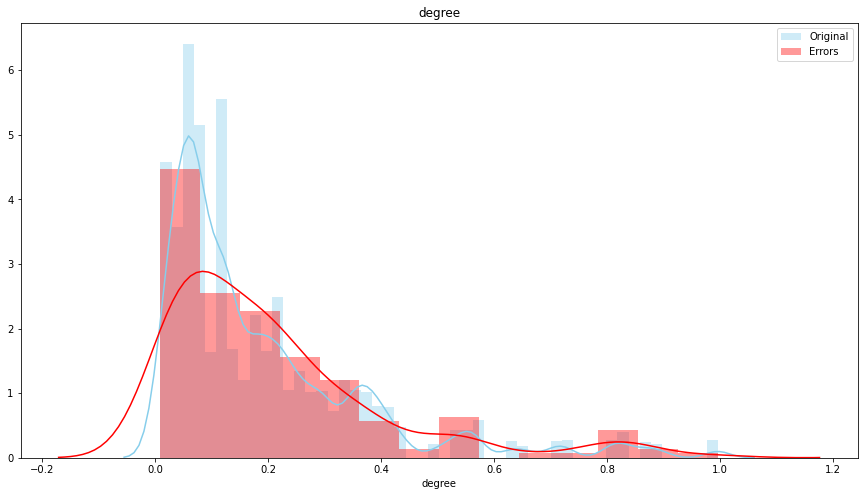

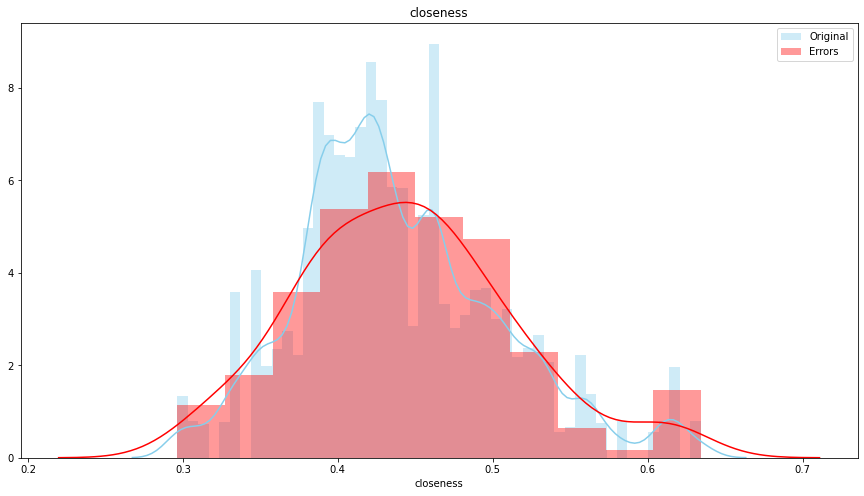

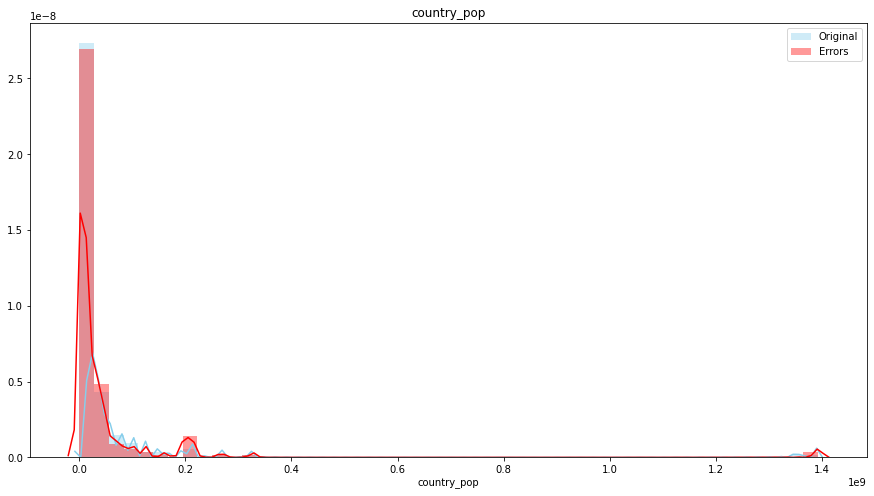

In [9]:
errors_distribution(linreg, X_test, y_test, X_train_val, n=200, X_test_scaled=X_test_scaled)